In [2]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
DATA_FOLDER = "G:\\My Drive\\Gdrive\\startup\\Novus Sentry\\data\\Data_load"
COLUMN_NAMES = ["time", "i1"]

In [4]:
def read_all_files_in_folder_load(folder_name: str):
  path = folder_name
  file_list = [f for f in listdir(path) if isfile(join(path, f)) and f.endswith(".csv")]
  df_list = []
  for fname in file_list:
    print(fname)
    df = pd.read_csv(fname, header=None)
    df = df.dropna(axis=1, how='all')
    df_list.append(df)
  return df_list, file_list


2022-10-26_074117095_Experiment 2 no load.csv
2022-10-26_210606095_Experiment 3.csv
2022-10-27_082959160_Experiment 4.csv
2022-10-27_171949981_DC Voltage(V).csv
2022-10-29_121517047_DC Voltage(V).csv
2022-10-31_125204212_DC Voltage(V).csv


C:\Users\janak\AppData\Local\Temp\ipykernel_15340\2157111672.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:,1] = df.iloc[:,1].rolling(400).max()
C:\Users\janak\AppData\Local\Temp\ipykernel_15340\2157111672.py:13: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  czcp = df.iloc[(df.iloc[:,1]).abs().argsort()[:1].item(), 0]
C:\Users\janak\AppData\Local\Temp\ipykernel_15340\2157111672.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

23498.1769109
7401.992294
10490.9360924
15984.5266293
57309.3991522
18867.4332667


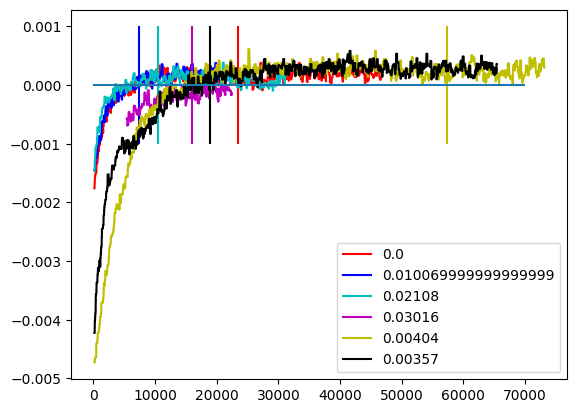

In [41]:
df_list, file_list = read_all_files_in_folder_load(DATA_FOLDER)
colors = ['r', 'b', 'c', 'm', 'y', 'k', 'g']
I_load = [0.0, 1.007 , 2.108 , 3.016 , 0.404, 0.357 ]

for i, df in enumerate(df_list):
    df.iloc[:,1] -= I_load[i]
    df.iloc[:, 1] /= 100.0
    N = df.iloc[:,1].argmin()
    df = df.iloc[N:,:]
    #df.iloc[:,1] -= df.iloc[:,1].mean()
    df.iloc[:,1] = df.iloc[:,1].rolling(400).max()
    df = df.dropna()
    czcp = df.iloc[(df.iloc[:,1]).abs().argsort()[:1].item(), 0]
    #czcp = df[(df.iloc[:, 1]<=0)].iloc[-1,0]
    print(czcp)
    plt.vlines(x = czcp, ymin = -0.001, ymax=0.001,
           colors = colors[i])
    plt.plot(df.iloc[:,0], df.iloc[:,1], color=colors[i], label = I_load[i]/100.0)

plt.hlines(y=0, xmin= 0, xmax = 70000)
plt.legend()
plt.show()
